# Problem Set 3 Solutions

### Solution 1:

In [72]:
import pandas as pd
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", sep = '|')

# Mean age per occupation
df = pd.pivot_table(users,'age','occupation')
df.columns = ['Mean Age']
df

,Mean Age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


In [48]:
# Male ratio per occupation and sort it from the highest to the lowest

total = users[['gender','occupation']]

totalCount = pd.pivot_table(total, 'gender','occupation', aggfunc = 'count')
#totalCount.head()

males_df = total.loc[total['gender'] == 'M']

males = pd.pivot_table(males_df, 'gender','occupation', aggfunc = 'count')
#males.head()

males_ratio = males/totalCount
males_ratio.sort_values(ascending=False, by='gender')

,gender
occupation,
doctor,1.000000
engineer,0.970149
technician,0.962963
retired,0.928571
programmer,0.909091
executive,0.906250
scientist,0.903226
entertainment,0.888889
lawyer,0.833333


In [71]:
# Minimum and maximum ages by occupation

total = users[['occupation','age']]
#total.head()

minAge = total.groupby('occupation').min()
#minAge.head()

maxAge = total.groupby('occupation').max()
#maxAge.head()

final = pd.concat([minAge,maxAge], axis = 1)
final.columns = ['Minimum Age', 'Maximum Age']
final

,Minimum Age,Maximum Age
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [70]:
# Calculate the mean age for each combination of occupation and sex

#total = users[['gender','occupation']]

df = pd.pivot_table(users, 'age',['occupation','gender'])
df.columns = ['Mean Age']
df

Mean Age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [75]:
# Rercentage of women and men by occupation

users.groupby('occupation')['gender'].value_counts(normalize=True)*100


occupation     gender
administrator  M          54.430380
               F          45.569620
artist         M          53.571429
               F          46.428571
doctor         M         100.000000
educator       M          72.631579
               F          27.368421
engineer       M          97.014925
               F           2.985075
entertainment  M          88.888889
               F          11.111111
executive      M          90.625000
               F           9.375000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         M          83.333333
               F          16.666667
librarian      F          56.862745
               M          43.137255
marketing      M          61.538462
               F          38.461538
none           M          55.555556
               F          44.444444
other          M          65.714286
               F          34.285714
progra

### Solution 2:

In [76]:
import pandas as pd
euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")
#euro12.head()
goals = euro12[['Goals']]
goals

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


In [81]:
# Number of team participated in the Euro2012

euro12['Team'].count()

16

In [82]:
# Number of columns in the dataset

euro12.shape[1]

35

In [84]:
# View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
#euro12.head()
discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [86]:
# Sort the teams by Red Cards, then to Yellow Cards

discipline.sort_values(by=['Red Cards','Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [89]:
# Mean Yellow Cards given per Team

discipline['Yellow Cards'].mean()

7.4375

In [92]:
# Filter teams that scored more than 6 goals

euro12[['Team','Goals']].loc[euro12['Goals'] > 6 ]

,Team,Goals
5,Germany,10
13,Spain,12


In [96]:
# Select the teams that start with G

euro12[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [98]:
# Select the first 7 columns

euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [99]:
# Select all columns except the last 3

euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [105]:
# Present only the Shooting Accuracy from England, Italy and Russia

df = euro12[['Team', 'Shooting Accuracy']]
df[(df.Team == 'England') | (df.Team == 'Italy') | (df.Team == 'Russia')]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


### Solution 3:

In [119]:
import pandas as pd
import numpy as np

# Create 3 differents Series
Series1 = pd.Series(np.random.randint(1, 5, size=100))

Series2 = pd.Series(np.random.randint(1, 4, size=100))

Series3 = pd.Series(np.random.randint(10000, 30001, size=100))

# Create a DataFrame by joinning the Series by column
df = pd.concat([Series1, Series2, Series3], axis = 1)
df

,0,1,2
0,3,1,16182
1,1,1,11897
2,1,1,29204
3,4,1,15279
4,1,1,18443
...,...,...,...
95,4,1,26241
96,4,2,15652
97,3,3,17169
98,3,1,29406


In [120]:
# Renaming the columns

df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
df

,bedrs,bathrs,price_sqr_meter
0,3,1,16182
1,1,1,11897
2,1,1,29204
3,4,1,15279
4,1,1,18443
...,...,...,...
95,4,1,26241
96,4,2,15652
97,3,3,17169
98,3,1,29406


In [130]:
bigcolumn = pd.concat([Series1, Series2, Series3], axis = 0)
bigcolumn

0         3
1         1
2         1
3         4
4         1
      ...  
95    26241
96    15652
97    17169
98    29406
99    13445
Length: 300, dtype: int32

#### Yes, the index seems to be going till 99 instead of 299 which is the length of the dataframe

In [311]:
bigcolumn.index = range(0, 300)
bigcolumn

0          3
1          1
2          1
3          4
4          1
       ...  
295    26241
296    15652
297    17169
298    29406
299    13445
Length: 300, dtype: int32

In [128]:
bigcolumn = df['bedrs'].astype(str) + df['bathrs'].astype(str) + df['price_sqr_meter'].astype(str)

bigcolumn.reindex(range(0, 300))

0      3116182
1      1111897
2      1129204
3      4115279
4      1118443
        ...   
295        NaN
296        NaN
297        NaN
298        NaN
299        NaN
Length: 300, dtype: object

### Solution 4:

In [188]:
import pandas as pd

# Assign wind.txt to a variable called data and replace the first 3 columns by a proper datetime index.
data = pd.read_csv('wind.txt', sep = '\s+')
data['Date'] = data['Mo'].astype(str) +"-"+ data["Dy"].astype(str)+"-"+ data["Yr"].astype(str) #Concatenating date objects

data['Date'] = pd.to_datetime(data['Date']) #Converting date column to proper datetime 
data = data.drop(columns=["Yr","Mo","Dy"])
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05


In [189]:
# Correct year value in Date

data["Date"] = np.where(pd.DatetimeIndex(data["Date"]).year < 2000,data.Date,data.Date - pd.offsets.DateOffset(years=100))

data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


In [190]:
#  Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns]

data = data.set_index('Date')
data.head()
data.index.astype("datetime64[ns]")


DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

In [306]:
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [191]:
# Compute missing values for each location over the entire record.They should be ignored in all calculations below

data.isna().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [192]:
# Compute non-missing values in total

data.notnull().sum().sum()

78857

In [175]:
# Calculate the mean windspeeds of the windspeeds over all the locations and all the times.

data.mean().mean()

10.227982360836924

In [193]:
# Create a DataFrame: loc_stats and calculate the min, max and mean windspeeds and standard deviations of windspeeds
# at each location over all the days
loc_stats = pd.concat([data.min(), data.max(), data.mean(), data.std()], axis=1) 
loc_stats.columns = ['Min', 'Max', 'Mean', 'Standard Deviation']
loc_stats

,Min,Max,Mean,Standard Deviation
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [194]:
# Create a DataFrame called day_stats and calculate the min, max and mean windspeed 
# and standard deviations of the windspeeds across all the locations at each day

day_stats = pd.concat([data.min(axis=1), data.max(axis=1), data.mean(axis=1), data.std(axis=1)], axis=1) 
day_stats.columns = ['Min', 'Max', 'Mean', 'Standard Deviation']
day_stats

,Min,Max,Mean,Standard Deviation
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [199]:
# Find the average windspeed in January for each location

Jan_windspeed = data[data.index.month == 1]
Jan_windspeed.mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [196]:
# Downsample the record to a yearly frequency for each location

data.resample('Y').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [197]:
# Downsample the record to a monthly frequency for each location

data.resample('M').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [207]:
# Downsample the record to a weekly frequency for each location

data.resample('W').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [213]:
# Calculate the min, max and mean windspeeds and standard deviations of the windspeeds 
# across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

week_df = data.resample('W').mean()
#week_df.head()
weekly_data = week_df[:52]

weekly_data = pd.concat([weekly_data.min(), weekly_data.max(), weekly_data.mean(), weekly_data.std()], axis=1)
weekly_data.columns = ['Min','Max','Mean','Standard Deviation']

weekly_data

,Min,Max,Mean,Standard Deviation
RPT,4.202857,19.880000,12.316163,3.419077
VAL,4.255714,16.417143,10.436978,2.900003
ROS,6.738571,18.225714,11.296667,2.789210
KIL,3.300000,12.720000,6.998690,2.091987
SHA,6.112857,17.432857,10.930691,2.674869
BIR,2.715714,14.828571,7.810330,2.426344
DUB,3.964286,15.565714,9.764986,2.850023
CLA,4.257143,15.160000,8.908732,2.447832
MUL,4.501429,14.480000,8.732106,2.412421
CLO,6.031429,16.461429,9.914712,2.595592


### Solution 5:

In [233]:
import pandas as pd
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep = '\t')

# first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [215]:
# Number of observations

chipo.shape[0]

4622

In [216]:
# Number of columns

chipo.shape[1]

5

In [218]:
# Print the name of all the columns

chipo.columns.values

array(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'], dtype=object)

In [ ]:
# How is the dataset indexed?

chipo.index

In [221]:
# Most-ordered item

chipo.groupby(['item_name']).quantity.sum().sort_values(ascending = False).index[0]

'Chicken Bowl'

In [227]:
# For the most-ordered item, how many items were ordered?

chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [228]:
# Most ordered item in the choice_description column

chipo.groupby(['choice_description']).sum().sort_values('quantity', ascending=False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [229]:
# Items orderd in total

chipo.quantity.sum()

4972

In [234]:
# Turn the item price into a float

# Check the item price type
chipo.dtypes.item_price


dtype('O')

In [235]:
# Create a lambda function and change the type of item price
chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:]))
# Check the item price type
chipo.dtypes.item_price

dtype('float64')

In [236]:
# Revenue for the period

Revenue = (chipo.quantity * chipo.item_price).sum()
print(Revenue)

39237.02


In [240]:
# Orders made in the period

order_count = chipo.order_id.nunique()
print(order_count)

1834


In [241]:
# Average revenue amount per order

Avg_Revenue = Revenue / order_count
print(Avg_Revenue)

21.39423118865867


In [242]:
# Different items are sold

chipo.item_name.nunique()

50

### Solution 6:

<Figure size 864x576 with 0 Axes>

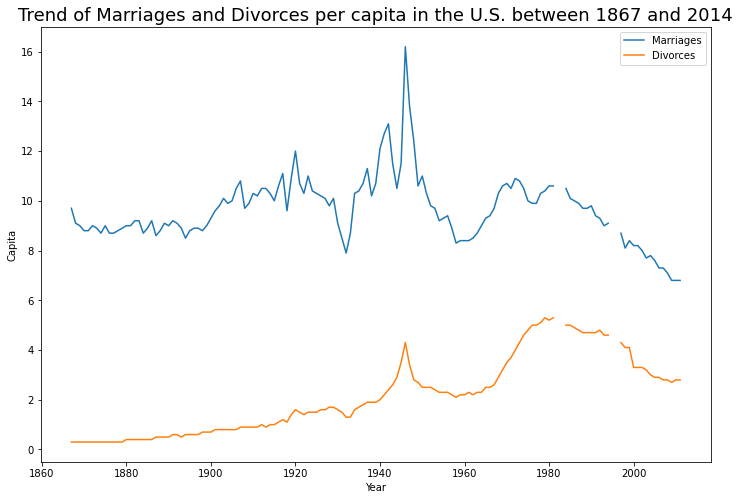

In [290]:
# Line Chart showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014

import pandas as pd
import matplotlib.pyplot as plt
mar_status = pd.read_csv('us-marriages-divorces-1867-2014.csv')
#mar_status.head()
plt.figure()
plt.rcParams["figure.figsize"] = [12, 8]

mar_status.plot( 'Year', ['Marriages_per_1000','Divorces_per_1000'], label=['Marriages', 'Divorces'])

plt.title('Trend of Marriages and Divorces per capita in the U.S. between 1867 and 2014', fontsize = 18)

# Set x & y axis labels
plt.xlabel('Year')
plt.ylabel('Capita')

plt.show()

### Solution 7:

In [261]:
# Vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.

mar_status1 = mar_status[['Year','Marriages_per_1000','Divorces_per_1000']]
mar_status1 = mar_status1.loc[((mar_status1['Year'] == 1900) | (mar_status1['Year'] == 1950) | (mar_status1['Year'] == 2000))]
mar_status1


,Year,Marriages_per_1000,Divorces_per_1000
33,1900,9.3,0.7
83,1950,11.0,2.5
133,2000,8.2,3.3


([<matplotlib.axis.XTick at 0x14cac56f430>,
 [Text(0, 0, '1900'), Text(1, 0, '1950'), Text(2, 0, '2000')])

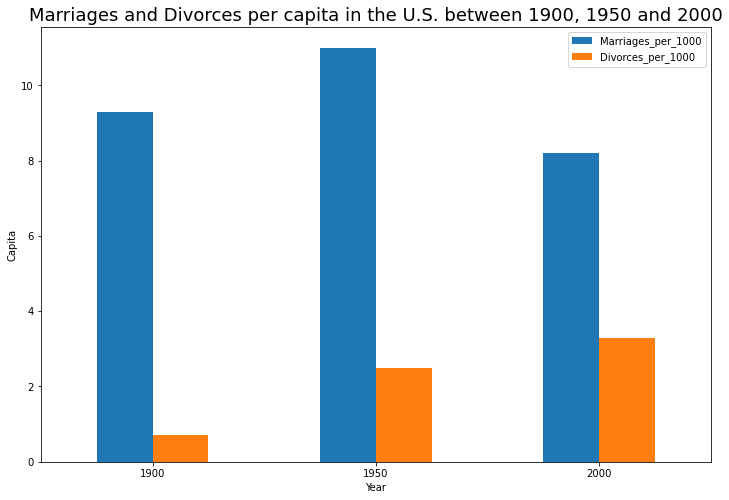

In [289]:
mar_status1[['Marriages_per_1000','Divorces_per_1000']].plot.bar()

plt.title("Marriages and Divorces per capita in the U.S. between 1900, 1950 and 2000", fontsize = 18)

plt.xlabel('Year')
plt.ylabel('Capita')

plt.xticks((0, 1, 2), ("1900", "1950", "2000"), rotation = 0)

### Solution 8:

Text(0, 0.5, 'Actor')

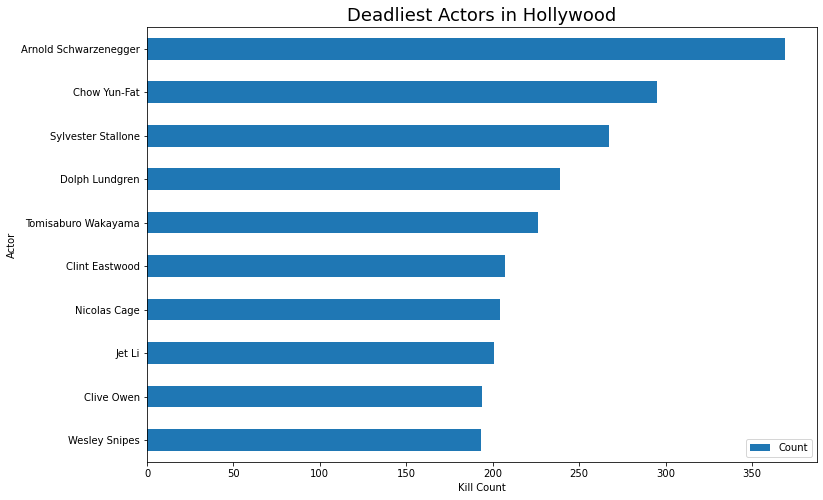

In [288]:
# Create a horizontal bar chart that compares the deadliest actors in Hollywood. 
# Sort the actors by their kill count and label each bar with the corresponding actor's name.

actors = pd.read_csv('actor_kill_counts.csv').sort_values('Count', ascending = True)
#actors.head()
actors.plot.barh(x='Actor', y='Count')

plt.title('Deadliest Actors in Hollywood', fontsize = 18)

plt.xlabel('Kill Count')
plt.ylabel('Actor')

### Solution 9:

In [276]:
# Create a pie chart showing the fraction of all Roman Emperors that were assassinated.

emperors = pd.read_csv('roman-emperor-reigns.csv')
emperors.head()
causes = emperors.groupby("Cause_of_Death")['Emperor'].count()
causes

Cause_of_Death
Assassinated             22
Died in captivity         1
Executed                  3
Illness                   5
Killed in battle          8
Natural causes           16
Possibly assassinated     8
Suicide                   5
Name: Emperor, dtype: int64

Text(0.5, 1.0, "Roman Emperors' Cause of Death")

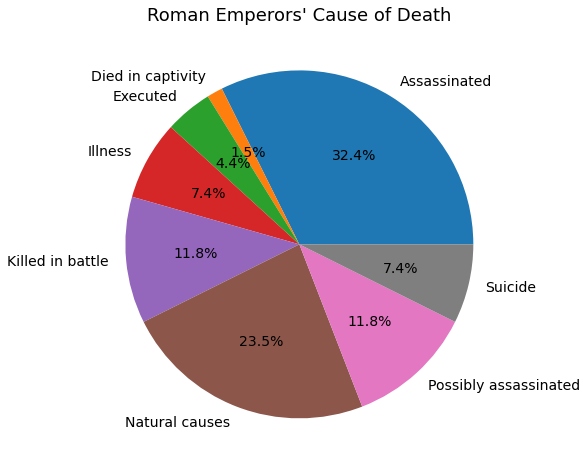

In [287]:
causes.plot.pie(autopct="%.1f%%", ylabel = '',fontsize = 14)
plt.title("Roman Emperors' Cause of Death", fontsize = 18)

### Solution 10:

Text(0, 0.5, 'Total Revenue Earned (billions)')

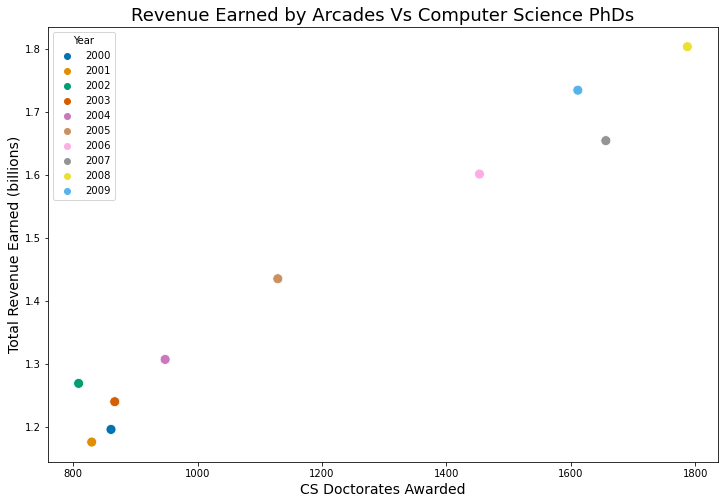

In [305]:
# Create a scatter plot showing the relationship between the total revenue earned by arcades 
# and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009

df = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

df.head()
import seaborn as sns
sns.scatterplot(x='Computer Science Doctorates Awarded (US)', y='Total Arcade Revenue (billions)', hue='Year', data=df, palette='colorblind', s = 100)
plt.title('Revenue Earned by Arcades Vs Computer Science PhDs', fontsize = 18)
plt.xlabel('CS Doctorates Awarded', size = 14)
plt.ylabel('Total Revenue Earned (billions)', size = 14)